<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в программирование"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# <center>Семинар 13. Python для анализа данных. Средства визуализации. NumPy, Pandas, Matplotlib, Seaborn
## <center>Практическое задание. Анализ данных пассажиров "Титаника"

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

**Описание признаков**

Survived   –     Выжил пассажир или нет (0/1) <br>
Pclass      –    Класс каюты (1/2/3) <br>
Name        –    Полное имя пассажира <br>
Sex        –     Пол <br>
Age        –     Возраст <br>
Sibsp      –     Число братьев/сестер/мужей/жен на борту <br>
Parch      –     Число родителей/детей на борту <br>
Ticket     –     Номер билета <br>
Fare       –     Стоимость билета <br>
Cabin      –     Номер палубы <br>
Embarked   –     Порт посадки пассажира (C = Cherbourg; Q = Queenstown; S = Southampton)

In [18]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Считываем обучающую выборку.**

In [19]:
train_df = pd.read_csv("C:/Users/akrazer/Desktop/Семинар библиотеки/titanic_train.csv") 

In [20]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Описание признаков**

survival   –     Выжил пассажир или нет (0/1) <br>
pclass      –    Класс каюты (1/2/3) <br>
name        –    Полное имя пассажира <br>
sex        –     Пол <br>
age        –     Взраст <br>
sibsp      –     Число братьев/сестер/мужей/жен на борту <br>
parch      –     Число родителей/детей на борту <br>
ticket     –     Номер билета <br>
fare       –     Стоимость билета <br>
cabin      –     Номер палубы <br>
embarked   –     Порт посадки пассажира (C = Cherbourg; Q = Queenstown; S = Southampton)

In [21]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Peduzzi, Mr. Joseph",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Заполним пропуски медианными значениями**

In [22]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

## Первичный анализ данных

**1. Сколько мужчин / жещин находилось на борту?**

In [23]:
print('Количество мужчин {},женщин {}'.format(sum(train_df['Sex'] == 'male'),sum(train_df['Sex'] == 'female')))
train_df['Sex'].value_counts()

Количество мужчин 577,женщин 314


male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно – это же распределение только для мужчин / женщин по отдельности.**

In [24]:
pd.crosstab(train_df['Pclass'], train_df['Sex'], margins = True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [25]:
print("Mean fare: ", round(train_df['Fare'].mean(),2)) #округление еще и до 2х знаков после запятой
print("Fare std: ", round(train_df['Fare'].std(),2)) #стандартное отклонение - 
print("Fare median", round(train_df['Fare'].median(),2))

Mean fare:  32.2
Fare std:  49.69
Fare median 14.45


**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" – те, кто моложе 30, а "старики" – те, кто старше 60.**

In [26]:
all_survived = train_df[train_df.Survived == 1]
old_survived = len(all_survived[all_survived.Age > 60])
young_survived = len(all_survived[all_survived.Age < 30])
print("Доли выживыших: \n\t среди молодых {}%, \n\t среди старых {}%.".format(
    round(100 * young_survived/len(all_survived), 2), round(100 * old_survived/len(all_survived), 2)))

Доли выживыших: 
	 среди молодых 60.82%, 
	 среди старых 1.46%.


**5. Правда ли, что женщины выживали чаще мужчин?**

In [27]:
male_survived = len(all_survived[all_survived.Sex == 'male'])
female_survived = len(all_survived[all_survived.Sex == 'female'])
print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(
    round(100 * female_survived/len(all_survived), 2), round(100 * male_survived/len(all_survived), 2)))

Доли выживыших: 
	 среди женщин 68.13%, 
	 среди мужчин 31.87%


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [28]:
temp = train_df[train_df.Sex == 'male']
names = temp.Name #хранятся мужские имена
listofnames = []
for i in names.index:
    listofnames.append((names[i].split())[2])
setofnames = set(listofnames)
d = dict.fromkeys(setofnames,0)
for i in d.keys():
    for j in range(len(listofnames)):
        if listofnames[j] == i:
            d[i] += 1
max_name = listofnames[0]
for i in d.keys():
    if d[i] > d[max_name]:
        max_name = i
print(max_name)

William


**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

In [29]:
mean_saved = train_df[train_df.Survived == 1]
mean_saved = round(mean_saved['Fare'].mean(),2)
mean_not_saved = train_df[train_df.Survived == 0]
mean_not_saved = round(mean_not_saved['Fare'].mean(),2)
print('В среднем, билет у спасенных стоил на {} у. е. больше, чем у погибших.'.format(round(mean_saved-mean_not_saved),2))

В среднем, билет у спасенных стоил на 26 у. е. больше, чем у погибших.


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [30]:
males = train_df[train_df.Sex == 'male']
females = train_df[train_df.Sex == 'female']
resulttable = [[0]*2 for i in range(3)]
resulttable[0][0] = round((males[males.Pclass == 1]).Age.mean(),2)
resulttable[1][0] =  round((males[males.Pclass == 2]).Age.mean(),2)
resulttable[2][0] =  round((males[males.Pclass == 3]).Age.mean(),2)
resulttable[0][1]=  round((females[females.Pclass == 1]).Age.mean(),2)
resulttable[1][1] =  round((females[females.Pclass == 2]).Age.mean(),2)
resulttable[2][1] =  round((females[females.Pclass == 3]).Age.mean(),2)
for i in range(len(resulttable)):
    print('Средний возраст спасенных мужчин {} класса больше, чем средний возраст спасенных женщин того же класса на {} года'.format(
        i+1,round(resulttable[i][0]-resulttable[i][1],2)))

Средний возраст спасенных мужчин 1 класса больше, чем средний возраст спасенных женщин того же класса на 5.02 года
Средний возраст спасенных мужчин 2 класса больше, чем средний возраст спасенных женщин того же класса на 1.81 года
Средний возраст спасенных мужчин 3 класса больше, чем средний возраст спасенных женщин того же класса на 3.34 года


## Первичный визуальный анализ данных

**9. Постройте попарные зависимости признаков `Age`, `Fare`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

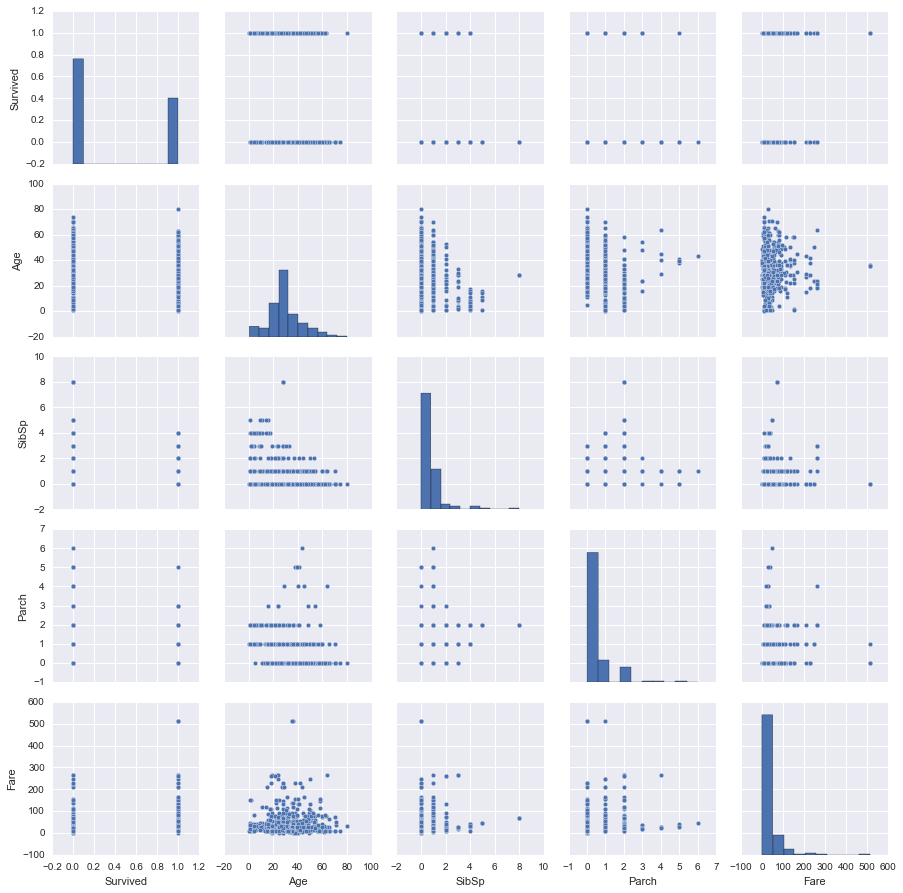

In [31]:
new_df = train_df.drop('PassengerId', axis=1)
new_df = new_df .drop('Pclass',axis = 1)
new_df = new_df .drop('Name',axis = 1)
new_df = new_df .drop('Sex',axis = 1)
new_df = new_df .drop('Ticket',axis = 1)
new_df = new_df .drop('Cabin',axis = 1)
sns.pairplot(new_df)

**10. Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

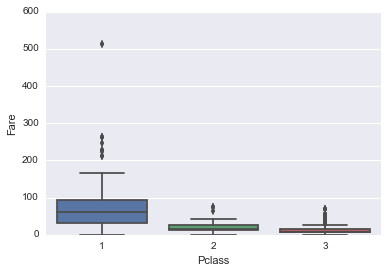

In [32]:
Fare = train_df['Fare']
Pclass = train_df['Pclass']
sns.boxplot(x = 'Pclass', y = 'Fare',data = train_df)

**11. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

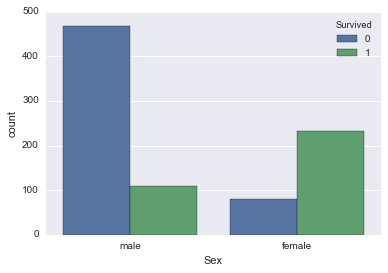

In [33]:
new_df = train_df.drop('PassengerId', axis=1)
new_df = new_df .drop('Pclass',axis = 1)
new_df = new_df .drop('Name',axis = 1)
new_df = new_df .drop('Age',axis = 1)
new_df = new_df .drop('SibSp',axis = 1)
new_df = new_df .drop('Parch',axis = 1)
new_df = new_df .drop('Ticket',axis = 1)
new_df = new_df .drop('Fare',axis = 1)
new_df = new_df .drop('Cabin',axis = 1)
new_df = new_df .drop('Embarked',axis = 1)
sns.countplot(x='Sex',hue = 'Survived',data = new_df, )

**12. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

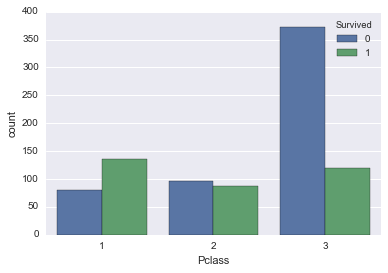

In [34]:
new_df = train_df.drop('PassengerId', axis=1)
new_df = new_df .drop('Name',axis = 1)
new_df = new_df .drop('Sex',axis = 1)
new_df = new_df .drop('Age',axis = 1)
new_df = new_df .drop('SibSp',axis = 1)
new_df = new_df .drop('Parch',axis = 1)
new_df = new_df .drop('Ticket',axis = 1)
new_df = new_df .drop('Fare',axis = 1)
new_df = new_df .drop('Cabin',axis = 1)
new_df = new_df .drop('Embarked',axis = 1)
sns.countplot(x='Pclass',data = new_df, hue = 'Survived')

**13. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

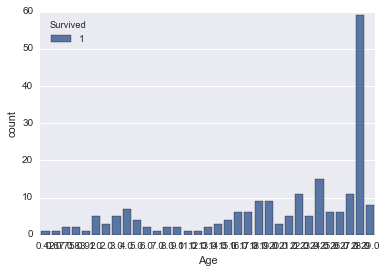

In [35]:
new_df = train_df.drop('PassengerId', axis=1)
new_df = new_df .drop('Name',axis = 1)
new_df = new_df .drop('Sex',axis = 1)
new_df = new_df .drop('Pclass',axis = 1)
new_df = new_df .drop('SibSp',axis = 1)
new_df = new_df .drop('Parch',axis = 1)
new_df = new_df .drop('Ticket',axis = 1)
new_df = new_df .drop('Fare',axis = 1)
new_df = new_df .drop('Cabin',axis = 1)
new_df = new_df .drop('Embarked',axis = 1)
new_df.head()
#all_survived = train_df[train_df.Survived == 1]
young = new_df[new_df.Age < 30]
old = new_df[new_df.Age > 60]
#all_dead = train_df[train_df.Survived == 0]
sns.countplot(x='Age',data = young[young.Survived == 1], hue = 'Survived')

5

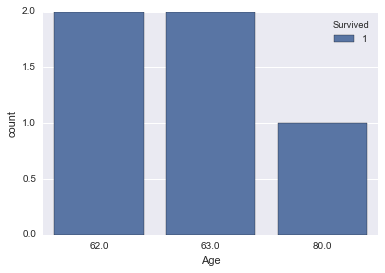

In [36]:
sns.countplot(x='Age',data = old[old.Survived == 1], hue = 'Survived')
len(old[old.Survived == 1])